<a href="https://colab.research.google.com/github/Neha1025/Subreddit-Post-Sentiment-Classification/blob/main/Subreddit_Post_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Post Sentiment Classification Task

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

In [ ]:
print('Training set contains {:d} reviews.'.format(len(train_data)))
print('Validation set contains {:d} reviews.'.format(len(validation_data)))
print('Test set contains {:d} reviews.'.format(len(test_data)))

Training set contains 12138 reviews.
Validation set contains 3109 reviews.
Test set contains 4016 reviews.


In [ ]:
train_data.columns

Index(['subreddit', 'title', 'id', 'url', 'author', 'body', 'majority_type',
       'is_first_post', 'post_depth', 'in_reply_to', 'sentiment.polarity',
       'sentiment.subjectivity'],
      dtype='object')

class: negative
0.07233481627945296
class: neutral
0.6326412918108419
class: positive
0.2661888284725655
class: very positive
0.02084363157027517
class: very negative
0.007991431866864393


(-1.1136909972705993,
 1.1006519537387514,
 -1.1108579542922878,
 1.1139793695338285)

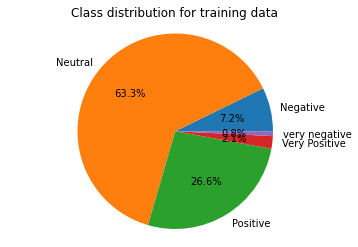

In [ ]:
import collections
a=[]
label_counts = collections.Counter(train_data['sentiment.polarity'])
for label in label_counts:
  print ("class: " + str(label))
  print (label_counts[label] / len(train_data))
  a.append(label_counts[label] / len(train_data))

# Creating dataset
labels = ['Negative', 'Neutral', 'Positive',
        'Very Positive', 'very negative']
   
# Creating plot
plt.title('Class distribution for training data')

plt.pie(a, labels = labels,autopct='%1.1f%%')
plt.axis('equal')


In [ ]:
train_data.groupby(by='sentiment.polarity').count()

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.subjectivity
sentiment.polarity,,,,,,,,,,,
negative,878,878,878,878,878,878,878,878,878,878,878
neutral,7679,7679,7679,7679,7679,7679,7679,7679,7679,7679,7679
positive,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231,3231
very negative,97,97,97,97,97,97,97,97,97,97,97
very positive,253,253,253,253,253,253,253,253,253,253,253


In [ ]:
test_data.groupby(by='sentiment.polarity').count()

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.subjectivity
sentiment.polarity,,,,,,,,,,,
negative,282,282,282,282,282,282,282,282,282,282,282
neutral,2514,2514,2514,2514,2514,2514,2514,2514,2514,2514,2514
positive,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102,1102
very negative,32,32,32,32,32,32,32,32,32,32,32
very positive,86,86,86,86,86,86,86,86,86,86,86


In [ ]:
validation_data.groupby(by='sentiment.polarity').count()

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.subjectivity
sentiment.polarity,,,,,,,,,,,
negative,215,215,215,215,215,215,215,215,215,215,215
neutral,1961,1961,1961,1961,1961,1961,1961,1961,1961,1961,1961
positive,845,845,845,845,845,845,845,845,845,845,845
very negative,15,15,15,15,15,15,15,15,15,15,15
very positive,73,73,73,73,73,73,73,73,73,73,73


In [ ]:
#train_data.head(20)
#validation_data.head(20)
#test_data.head(10)

In [ ]:
import spacy

# Load the medium english model. 
# We will use this model to get embedding features for tokens later.
#!python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Tokenization and Normalization**

In [ ]:
#Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens
  return normalized_tokens

#Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

**Count Vectorizer**
Count vectoriser is a basic vectoriser which takes every token (in this case a word) from our data and is turned into a feature. As a whole it converts a collection of text documents to a sparse matrix of token counts.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize, binary=True)
train_features = one_hot_vectorizer.fit_transform(train_data['body'])

# This creates input features for our classification on all subsets of our collection.
validation_features = one_hot_vectorizer.transform(validation_data['body'])
test_features = one_hot_vectorizer.transform(test_data['body'])

**Data Label**

In [ ]:
train_labels = train_data['sentiment.polarity']
validation_labels = validation_data['sentiment.polarity']
test_labels = test_data['sentiment.polarity']


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels,average='macro')
  recall = recall_score(predictions, true_labels,average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1,average='weighted') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3, zero_division = 0))
  
  report=classification_report(predictions, true_labels, digits=3, zero_division = 0,output_dict=True)
  df = pd.DataFrame(report).transpose()
  #plt.bar(train_labels,df['f1-score'])
  classes=["negative","neutral","positive","very negative","very positive"]
  f=df['f1-score'][:5]
 
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted
 
  plt.bar(classes,f)
  plt.xlabel("Labels")
  plt.ylabel("F1-Score")

  
  df1 = pd.DataFrame({'Precision':df['precision'][:5],
                     'Recall':df['recall'][:5],
                     'F1':df['f1-score'][:5]
  },
                     
                     index = ["negative","neutral","positive","very negative","very positive"])
  
  df1.plot.bar()
  plt.title('Performance Analysis')
  plt.ylabel('Performance Metrics')
  plt.xlabel('Classes')
  plt.show()
  


**LR with One Hot vectorization**

Evaluation for: One-hot LR
Classifier 'One-hot LR' has Acc=0.752 P=0.461 R=0.633 F1=0.766
               precision    recall  f1-score   support

     negative      0.260     0.519     0.347       108
      neutral      0.883     0.781     0.829      2215
     positive      0.619     0.702     0.658       745
very negative      0.200     0.429     0.273         7
very positive      0.342     0.735     0.467        34

     accuracy                          0.752      3109
    macro avg      0.461     0.633     0.515      3109
 weighted avg      0.790     0.752     0.766      3109


Confusion matrix:
 [[  56  151    7    1    0]
 [  46 1731  176    3    5]
 [   5  313  523    0    4]
 [   1   11    0    3    0]
 [   0    9   39    0   25]]


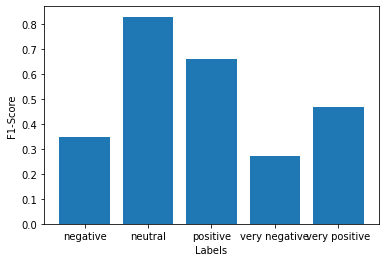

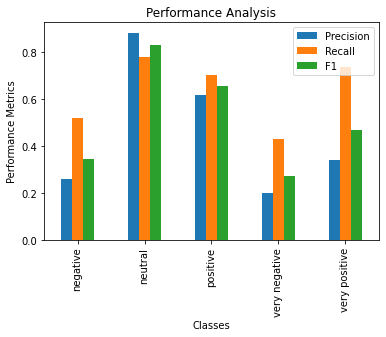

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter = 1000)
lr_model = lr.fit(train_features, train_labels)
validation_predicted_labels = lr_model.predict(validation_features)
evaluation_summary("One-hot LR",  validation_predicted_labels, validation_labels)

**Dummy Classifer with Strategy-'most_frequent'**

0.6307494371180444
Evaluation for: Dummy Majority
Classifier 'Dummy Majority' has Acc=0.631 P=0.200 R=0.126 F1=0.774
               precision    recall  f1-score   support

     negative      0.000     0.000     0.000         0
      neutral      1.000     0.631     0.774      3109
     positive      0.000     0.000     0.000         0
very negative      0.000     0.000     0.000         0
very positive      0.000     0.000     0.000         0

     accuracy                          0.631      3109
    macro avg      0.200     0.126     0.155      3109
 weighted avg      1.000     0.631     0.774      3109


Confusion matrix:
 [[   0  215    0    0    0]
 [   0 1961    0    0    0]
 [   0  845    0    0    0]
 [   0   15    0    0    0]
 [   0   73    0    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


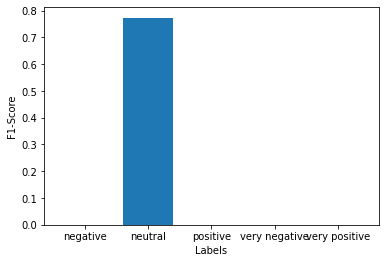

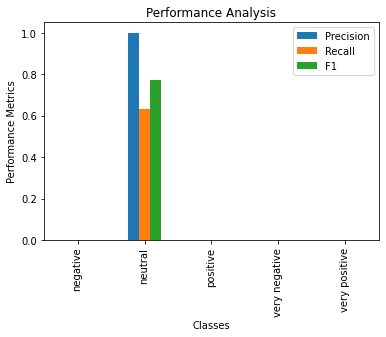

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(train_features, train_labels)
print(dummy_mf.score(validation_features, validation_labels))
evaluation_summary("Dummy Majority", dummy_mf.predict(validation_features), validation_labels)


**Dummy Classifer with Strategy-'Stratified'**

0.4808620135091669
Evaluation for: Dummy Prior
Classifier 'Dummy Prior' has Acc=0.471 P=0.190 R=0.190 F1=0.470
               precision    recall  f1-score   support

     negative      0.065     0.058     0.061       243
      neutral      0.629     0.629     0.629      1963
     positive      0.254     0.263     0.259       816
very negative      0.000     0.000     0.000        23
very positive      0.000     0.000     0.000        64

     accuracy                          0.471      3109
    macro avg      0.190     0.190     0.190      3109
 weighted avg      0.469     0.471     0.470      3109


Confusion matrix:
 [[  14  140   53    5    3]
 [ 143 1234  530   14   40]
 [  77  529  215    4   20]
 [   2   10    2    0    1]
 [   7   50   16    0    0]]


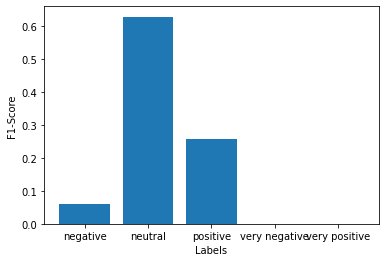

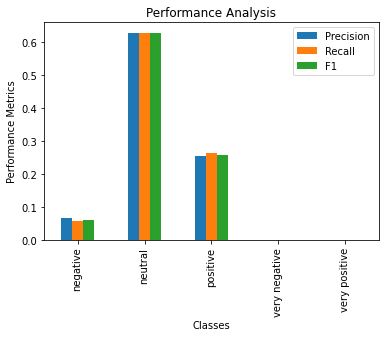

In [ ]:
dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_features, train_labels)
print(dummy_prior.score(validation_features, validation_labels))
evaluation_summary("Dummy Prior", dummy_prior.predict(validation_features), validation_labels)


**SVC Classifer with One Hot** **vectorization**

Evaluation for: One-hot SVC
Classifier 'One-hot SVC' has Acc=0.722 P=0.285 R=0.423 F1=0.773
               precision    recall  f1-score   support

     negative      0.019     0.667     0.036         6
      neutral      0.944     0.721     0.818      2567
     positive      0.463     0.729     0.566       536
very negative      0.000     0.000     0.000         0
very positive      0.000     0.000     0.000         0

     accuracy                          0.722      3109
    macro avg      0.285     0.423     0.284      3109
 weighted avg      0.859     0.722     0.773      3109


Confusion matrix:
 [[   4  208    3    0    0]
 [   1 1851  109    0    0]
 [   1  453  391    0    0]
 [   0   15    0    0    0]
 [   0   40   33    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


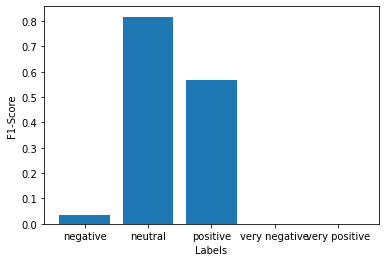

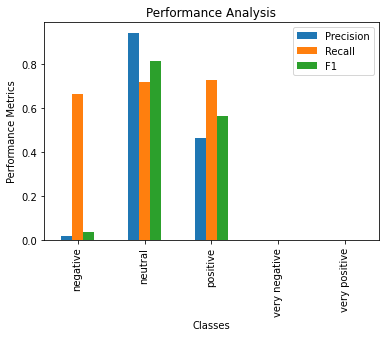

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
svm_model=clf.fit(train_features, train_labels)
validation_predicted_labels = clf.predict(validation_features)
evaluation_summary("One-hot SVC",  validation_predicted_labels, validation_labels)

**Naive Bayes with One hot vectorization**

Evaluation for: One-hot NB
Classifier 'One-hot NB' has Acc=0.635 P=0.224 R=0.234 F1=0.712
               precision    recall  f1-score   support

     negative      0.000     0.000     0.000         3
      neutral      0.922     0.651     0.763      2779
     positive      0.198     0.517     0.286       323
very negative      0.000     0.000     0.000         4
very positive      0.000     0.000     0.000         0

     accuracy                          0.635      3109
    macro avg      0.224     0.234     0.210      3109
 weighted avg      0.845     0.635     0.712      3109


Confusion matrix:
 [[   0  213    2    0    0]
 [   3 1808  147    3    0]
 [   0  677  167    1    0]
 [   0   15    0    0    0]
 [   0   66    7    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


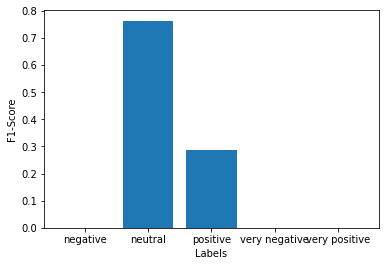

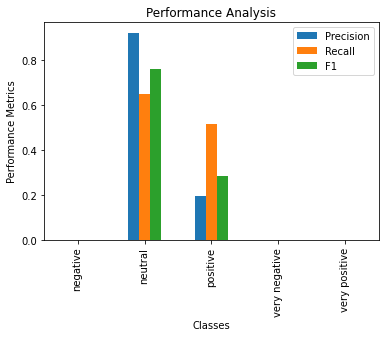

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
nb_model = classifier.fit(train_features, train_labels)
validation_predicted_labels = nb_model.predict(validation_features)
evaluation_summary("One-hot NB",  validation_predicted_labels, validation_labels)

In [ ]:
print(nb_model.score(train_features, train_labels))
print(svm_model.score(train_features, train_labels))
print(lr_model.score(train_features, train_labels))

0.7440270225737354
0.8627450980392157
0.9621848739495799


In [ ]:
print(lr_model.score(validation_features, validation_labels))
print(svm_model.score(validation_features, validation_labels))
print(nb_model.score(validation_features, validation_labels))

0.752010292698617
0.7224187841749758
0.6352524927629463


**Logistic Regression with TF-IDF Vectorization**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.727 P=0.321 R=0.582 F1=0.765
               precision    recall  f1-score   support

     negative      0.098     0.700     0.171        30
      neutral      0.929     0.733     0.819      2486
     positive      0.484     0.700     0.572       584
very negative      0.000     0.000     0.000         0
very positive      0.096     0.778     0.171         9

     accuracy                          0.727      3109
    macro avg      0.321     0.582     0.347      3109
 weighted avg      0.835     0.727     0.765      3109


Confusion matrix:
 [[  21  188    6    0    0]
 [   6 1822  132    0    1]
 [   1  434  409    0    1]
 [   2   13    0    0    0]
 [   0   29   37    0    7]]


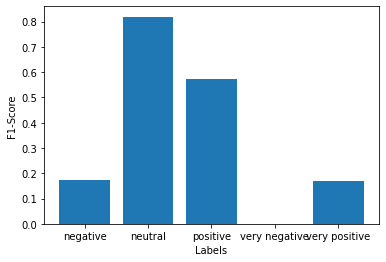

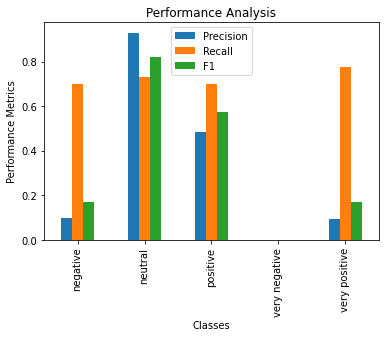

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_Vectoriser=TfidfVectorizer( binary=True)#,sublinear_tf = True, max_features = 50000) 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='lbfgs', max_iter = 100,penalty='l2')
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
validation_predicted_labels = lr_model1.predict(validation_features_TFIDF)
evaluation_summary("TF-IDF LR",  validation_predicted_labels, validation_labels)

**`Parameter** **Tuning** **(LR with TF-IDF)**

Case 1: sublinear_tf = False

Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.734 P=0.324 R=0.596 F1=0.772
               precision    recall  f1-score   support

     negative      0.096     0.659     0.167        41
      neutral      0.932     0.737     0.823      3178
     positive      0.521     0.727     0.607       790
very negative      0.000     0.000     0.000         0
very positive      0.070     0.857     0.129         7

     accuracy                          0.734      4016
    macro avg      0.324     0.596     0.345      4016
 weighted avg      0.841     0.734     0.772      4016



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion matrix:
 [[  27  247    8    0    0]
 [  10 2342  162    0    0]
 [   0  527  574    0    1]
 [   4   28    0    0    0]
 [   0   34   46    0    6]]


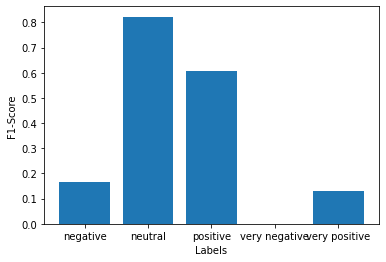

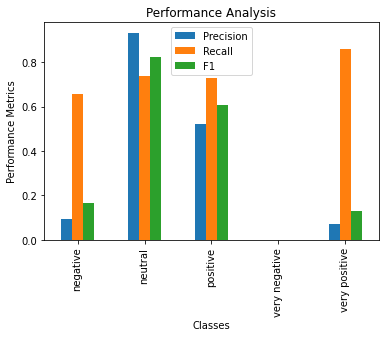

In [ ]:
TFIDF_Vectoriser=TfidfVectorizer( binary=True,sublinear_tf = False,max_features=50000) 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='saga', max_iter = 1000)
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
test_predicted_labels1 = lr_model1.predict(test_features_TFIDF)
evaluation_summary("TF-IDF LR",  test_predicted_labels1, test_labels)


Just changing max_iter for LR did not show much result.
Case 2 Changing max_iter =5000 and solver='newton-cg'

Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.745 P=0.343 R=0.811 F1=0.781
               precision    recall  f1-score   support

     negative      0.106     0.682     0.184        44
      neutral      0.933     0.748     0.830      3137
     positive      0.553     0.738     0.632       825
very negative      0.031     1.000     0.061         1
very positive      0.093     0.889     0.168         9

     accuracy                          0.745      4016
    macro avg      0.343     0.811     0.375      4016
 weighted avg      0.844     0.745     0.781      4016


Confusion matrix:
 [[  30  241   11    0    0]
 [  11 2345  158    0    0]
 [   0  492  609    0    1]
 [   3   28    0    1    0]
 [   0   31   47    0    8]]


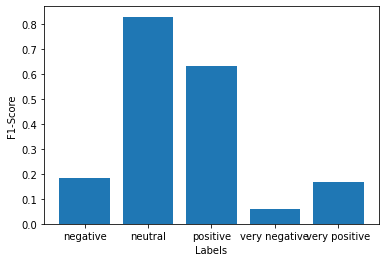

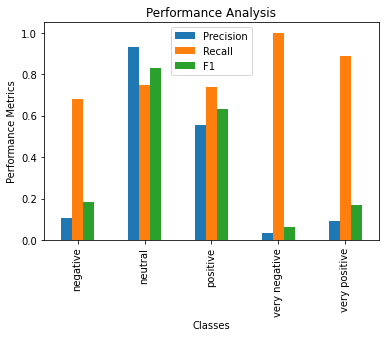

In [ ]:
TFIDF_Vectoriser=TfidfVectorizer( binary=True,sublinear_tf = True, max_features = 5000) 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='newton-cg', max_iter = 1000)
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
test_predicted_labels1 = lr_model1.predict(test_features_TFIDF)
evaluation_summary("TF-IDF LR",  test_predicted_labels1, test_labels)

Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.749 P=0.367 R=0.779 F1=0.779
               precision    recall  f1-score   support

     negative      0.117     0.559     0.194        59
      neutral      0.923     0.753     0.830      3079
     positive      0.577     0.741     0.649       858
very negative      0.031     1.000     0.061         1
very positive      0.186     0.842     0.305        19

     accuracy                          0.749      4016
    macro avg      0.367     0.779     0.408      4016
 weighted avg      0.833     0.749     0.779      4016


Confusion matrix:
 [[  33  238   11    0    0]
 [  20 2320  171    0    3]
 [   2  464  636    0    0]
 [   4   27    0    1    0]
 [   0   30   40    0   16]]


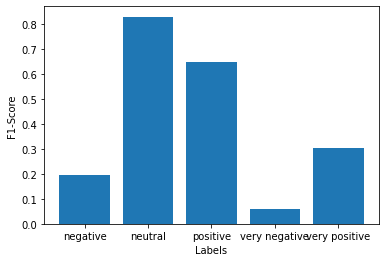

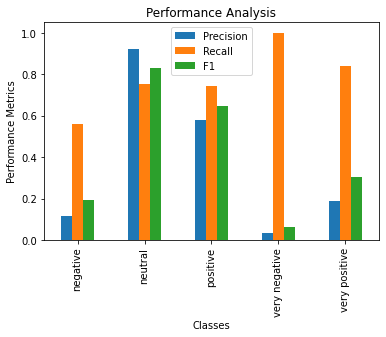

In [ ]:
TFIDF_Vectoriser=TfidfVectorizer( binary=True,sublinear_tf = True, max_features = 1000) 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='newton-cg', max_iter = 1000)
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
test_predicted_labels1 = lr_model1.predict(test_features_TFIDF)
evaluation_summary("TF-IDF LR",  test_predicted_labels1, test_labels)

Case 3. Max features=NONE

Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.734 P=0.324 R=0.596 F1=0.772
               precision    recall  f1-score   support

     negative      0.096     0.659     0.167        41
      neutral      0.932     0.737     0.823      3178
     positive      0.521     0.727     0.607       790
very negative      0.000     0.000     0.000         0
very positive      0.070     0.857     0.129         7

     accuracy                          0.734      4016
    macro avg      0.324     0.596     0.345      4016
 weighted avg      0.841     0.734     0.772      4016



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion matrix:
 [[  27  247    8    0    0]
 [  10 2342  162    0    0]
 [   0  527  574    0    1]
 [   4   28    0    0    0]
 [   0   34   46    0    6]]


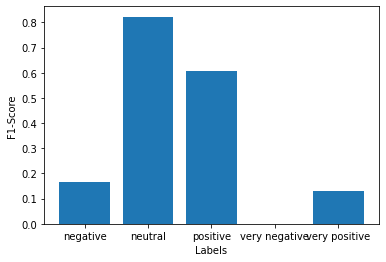

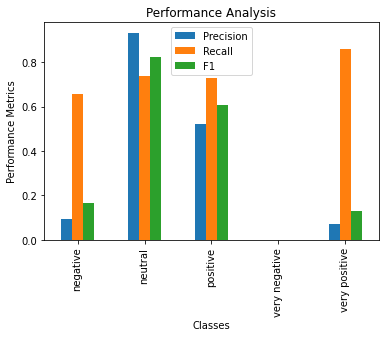

In [ ]:
TFIDF_Vectoriser=TfidfVectorizer( binary=True,sublinear_tf = True, max_features = None) 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='saga', max_iter = 1000)
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
test_predicted_labels1 = lr_model1.predict(test_features_TFIDF)
evaluation_summary("TF-IDF LR",  test_predicted_labels1, test_labels)

Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.719 P=0.506 R=0.516 F1=0.721
               precision    recall  f1-score   support

     negative      0.383     0.452     0.415       239
      neutral      0.801     0.795     0.798      2533
     positive      0.662     0.646     0.654      1129
very negative      0.406     0.394     0.400        33
very positive      0.279     0.293     0.286        82

     accuracy                          0.719      4016
    macro avg      0.506     0.516     0.510      4016
 weighted avg      0.723     0.719     0.721      4016


Confusion matrix:
 [[ 108  154   12    6    2]
 [ 114 2014  342   13   31]
 [  12  335  729    1   25]
 [   5   13    1   13    0]
 [   0   17   45    0   24]]


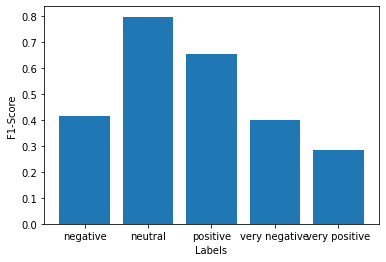

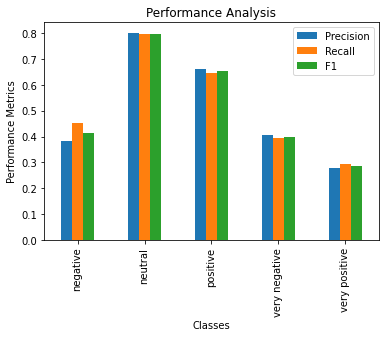

In [ ]:
TFIDF_Vectoriser=TfidfVectorizer( binary=True,sublinear_tf = True, max_features = 5000) 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='saga', max_iter = 10000,C=1000.0)
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
test_predicted_labels1 = lr_model1.predict(test_features_TFIDF)
evaluation_summary("TF-IDF LR",  test_predicted_labels1, test_labels)

**Adding Vectorization parameter "norm='l1"**

Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.763 P=0.471 R=0.583 F1=0.775
               precision    recall  f1-score   support

     negative      0.326     0.571     0.415       161
      neutral      0.879     0.795     0.835      2781
     positive      0.666     0.728     0.696      1008
very negative      0.250     0.364     0.296        22
very positive      0.233     0.455     0.308        44

     accuracy                          0.763      4016
    macro avg      0.471     0.583     0.510      4016
 weighted avg      0.793     0.763     0.775      4016


Confusion matrix:
 [[  92  179    8    2    1]
 [  59 2211  221   12   11]
 [   2  354  734    0   12]
 [   8   16    0    8    0]
 [   0   21   45    0   20]]


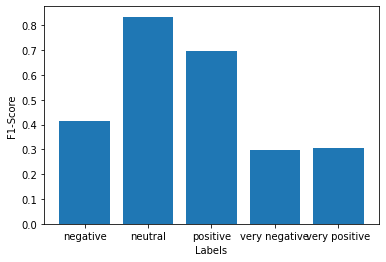

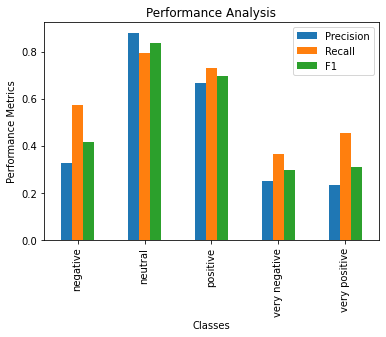

In [ ]:
TFIDF_Vectoriser=TfidfVectorizer( binary=True,sublinear_tf = True, max_features = 3000,norm='l1') 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='newton-cg', max_iter = 10000,C=100)
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
test_predicted_labels1 = lr_model1.predict(test_features_TFIDF)
evaluation_summary("TF-IDF LR",  test_predicted_labels1, test_labels)

**Adding Vectorization parameter "norm=l2"**

Evaluation for: TF-IDF LR
Classifier 'TF-IDF LR' has Acc=0.741 P=0.512 R=0.530 F1=0.743
               precision    recall  f1-score   support

     negative      0.372     0.429     0.398       245
      neutral      0.825     0.805     0.815      2578
     positive      0.687     0.699     0.693      1083
very negative      0.375     0.387     0.381        31
very positive      0.302     0.329     0.315        79

     accuracy                          0.741      4016
    macro avg      0.512     0.530     0.520      4016
 weighted avg      0.747     0.741     0.743      4016


Confusion matrix:
 [[ 105  164    7    5    1]
 [ 125 2075  280   14   20]
 [   7  306  757    0   32]
 [   7   13    0   12    0]
 [   1   20   39    0   26]]


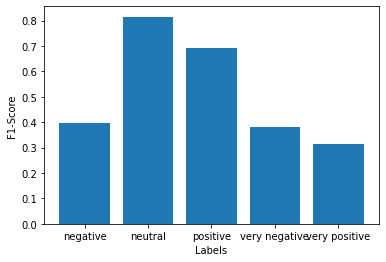

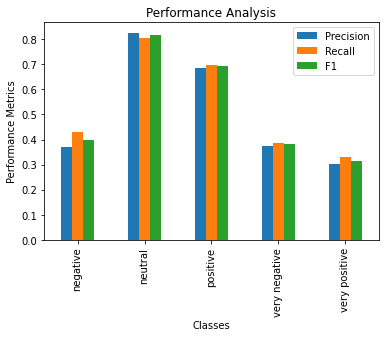

In [ ]:
TFIDF_Vectoriser=TfidfVectorizer( binary=True,sublinear_tf = True, max_features = 3000,norm='l2') 
train_features_TFIDF = TFIDF_Vectoriser.fit_transform(train_data['body'])
# This creates input features for our classification on all subsets of our collection.
validation_features_TFIDF = TFIDF_Vectoriser.transform(validation_data['body'])
test_features_TFIDF = TFIDF_Vectoriser.transform(test_data['body'])
lr_tfidf = LogisticRegression(solver='newton-cg', max_iter = 10000,C=100)
lr_model1 = lr_tfidf.fit(train_features_TFIDF, train_labels)
test_predicted_labels1 = lr_model1.predict(test_features_TFIDF)
evaluation_summary("TF-IDF LR",  test_predicted_labels1, test_labels)

**Adding features**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [ ]:
CountVectorizer( binary=True ) 

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Use FeatureUnion to combine the features from body and majority_type
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf-idf', TfidfVectorizer( binary=True,sublinear_tf = False,max_features=50000)), 
              ])),
            ('subreddit', Pipeline([
              ('selector', ItemSelector(key='subreddit')),
              ('tf-idf', TfidfVectorizer( binary=True,sublinear_tf = False,max_features=50000)), 
              ])),
        ])
        )
    ])

In [ ]:
one_hot_train_features = prediction_pipeline.fit_transform(train_data)
one_hot_validation_features = prediction_pipeline.transform(validation_data)
one_hot_test_features = prediction_pipeline.transform(test_data)

Evaluation for: LR
Classifier 'LR' has Acc=0.733 P=0.441 R=0.558 F1=0.743
               precision    recall  f1-score   support

     negative      0.349     0.581     0.436       129
      neutral      0.848     0.777     0.811      2140
     positive      0.614     0.652     0.633       796
very negative      0.133     0.250     0.174         8
very positive      0.260     0.528     0.349        36

     accuracy                          0.733      3109
    macro avg      0.441     0.558     0.480      3109
 weighted avg      0.759     0.733     0.743      3109


Confusion matrix:
 [[  75  132    8    0    0]
 [  50 1663  232    6   10]
 [   2  317  519    0    7]
 [   2   11    0    2    0]
 [   0   17   37    0   19]]


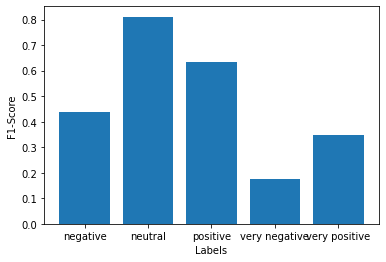

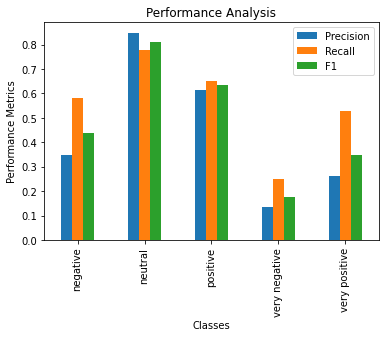

In [ ]:
lr = LogisticRegression(solver='saga',max_iter = 10000,C=100)
combined_model = lr.fit(one_hot_train_features,train_labels)
evaluation_summary("LR", lr.predict(one_hot_validation_features), validation_labels) 

Evaluation for: LR
Classifier 'LR' has Acc=0.747 P=0.456 R=0.629 F1=0.758
               precision    recall  f1-score   support

     negative      0.291     0.539     0.378       152
      neutral      0.861     0.785     0.821      2757
     positive      0.655     0.686     0.670      1052
very negative      0.219     0.636     0.326        11
very positive      0.256     0.500     0.338        44

     accuracy                          0.747      4016
    macro avg      0.456     0.629     0.507      4016
 weighted avg      0.777     0.747     0.758      4016


Confusion matrix:
 [[  82  189    8    3    0]
 [  59 2165  282    1    7]
 [   3  362  722    0   15]
 [   7   18    0    7    0]
 [   1   23   40    0   22]]


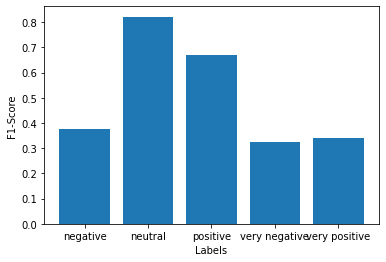

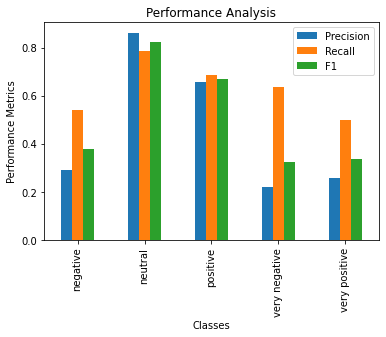

In [ ]:
lr = LogisticRegression(solver='saga',max_iter = 10000,C=100)
combined_model = lr.fit(one_hot_train_features,train_labels)
evaluation_summary("LR", lr.predict(one_hot_test_features), test_labels) 